# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

# Calculate Slope #

In [6]:
def calc_slope(xs,ys):
    x_bar = sum(xs)/len(xs)
    y_bar = sum(ys)/len(ys)
    x_times_y_bar = sum(xs*ys)/len(xs*ys)
    x_squared_bar = sum(xs**2)/len(xs**2)
    return (x_bar * y_bar - x_times_y_bar) / (x_bar**2 - x_squared_bar)
    pass
calc_slope(X,Y)

0.5575757575757568

# Calculate Best Fit Line #

In [7]:
def best_fit(xs,ys):
    slope=calc_slope(xs,ys)
    x_bar=x_bar = sum(xs)/len(xs)
    y_bar = sum(ys)/len(ys)
    intercept=y_bar - slope*x_bar
    return slope,intercept
m,c = best_fit(X,Y)
best_fit(X,Y)

(0.5575757575757568, 6.3333333333333375)

# Calculate Regression Line #

In [8]:
def reg_line (m, c, xs):
    return [m*x+c for x in xs]
    pass

# Uncomment below
regression_line = reg_line(m,c,X)
regression_line

[6.890909090909094,
 7.448484848484851,
 8.006060606060608,
 8.563636363636364,
 9.121212121212121,
 9.67878787878788,
 10.236363636363635,
 10.793939393939393,
 11.351515151515148,
 11.909090909090907]

# Calculate R-Squared #

In [10]:
def sq_err(y_real, y_predicted):
    return np.sum((y_real - y_predicted)**2)
sq_err(Y,regression_line)

0.7515151515151492

In [12]:
def r_squared(y_real, y_predicted):
    y_bar = sum(y_real)/len(y_real)
    SSE = round(sq_err(y_real,y_predicted),2)
    SST=0
    for n in y_real:
        SST += (n-y_bar)**2
    return round(1-(SSE/SST),2)
    pass
r2=r_squared(Y,regression_line)

In [19]:
print('Basic Regression Diagnostics')
print('Slope: ', round(m,2))
print('Y-Intercept: ', round(c,2))
print('R-Squared: ', r2)
print('Model: Y =', round(m,2), '* X +', round(c,2))

Basic Regression Diagnostics
Slope:  0.56
Y-Intercept:  6.33
R-Squared:  0.97
Model: Y = 0.56 * X + 6.33


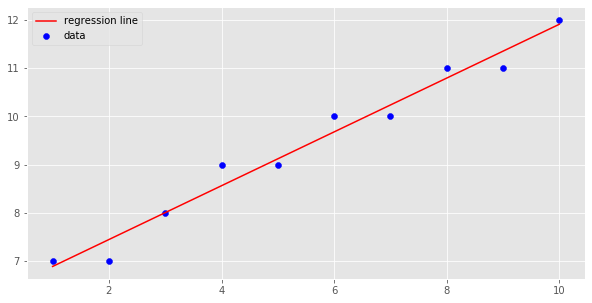

In [24]:
fig,ax=plt.subplots(figsize=(10,5))
ax1=plt.scatter(X,Y, color='blue', label='data')
ax2=plt.plot(X,regression_line,color='red', label='regression line')
plt.legend()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


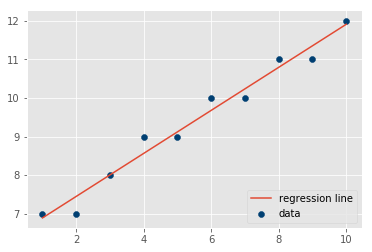

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [28]:
x_new = 4.5
y_prediction = x_new*m+c

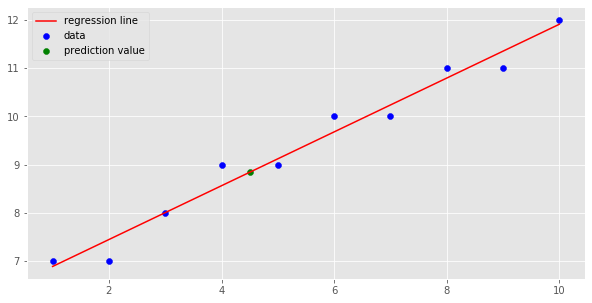

In [31]:
# Make prediction for x = 4.5 and visualize on the scatter plot
fig,ax=plt.subplots(figsize=(10,5))
ax1=plt.scatter(X,Y, color='blue', label='data')
ax2=plt.plot(X,regression_line,color='red', label='regression line')
ax3=plt.scatter(x_new,y_prediction, color='green', label='prediction value')
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [32]:
import pandas as pd

In [40]:
df=pd.read_csv('heightweight.csv')
X = np.array(df.height)
Y = np.array(df.weight)
X,Y

(array([68, 71, 61, 69, 71, 58, 72, 73, 58, 74, 61, 59, 69, 68, 64, 69, 72,
        66, 65, 69]),
 array([165, 201, 140, 170, 192, 125, 195, 205, 115, 210, 135, 125, 172,
        175, 145, 170, 200, 155, 150, 171]))

In [41]:
def calc_slope(xs,ys):
    x_bar = sum(xs)/len(xs)
    y_bar = sum(ys)/len(ys)
    x_times_y_bar = sum(xs*ys)/len(xs*ys)
    x_squared_bar = sum(xs**2)/len(xs**2)
    return (x_bar * y_bar - x_times_y_bar) / (x_bar**2 - x_squared_bar)
    pass
calc_slope(X,Y)

5.539019232705614

In [42]:
def best_fit(xs,ys):
    slope=calc_slope(xs,ys)
    x_bar=x_bar = sum(xs)/len(xs)
    y_bar = sum(ys)/len(ys)
    intercept=y_bar - slope*x_bar
    return slope,intercept
m,c = best_fit(X,Y)
best_fit(X,Y)

(5.539019232705614, -204.48343570637024)

In [43]:
def reg_line (m, c, xs):
    return [m*x+c for x in xs]
    pass

regression_line = reg_line(m,c,X)
regression_line

[172.16987211761148,
 188.78692981572834,
 133.39673748867216,
 177.70889135031712,
 188.78692981572834,
 116.77967979055535,
 194.32594904843393,
 199.86496828113957,
 116.77967979055535,
 205.40398751384515,
 133.39673748867216,
 122.31869902326093,
 177.70889135031712,
 172.16987211761148,
 150.01379518678903,
 177.70889135031712,
 194.32594904843393,
 161.09183365220025,
 155.55281441949467,
 177.70889135031712]

In [44]:
def sq_err(y_real, y_predicted):
    return np.sum((y_real - y_predicted)**2)
sq_err(Y,regression_line)

712.681502366329

In [45]:
def r_squared(y_real, y_predicted):
    y_bar = sum(y_real)/len(y_real)
    SSE = round(sq_err(y_real,y_predicted),2)
    SST=0
    for n in y_real:
        SST += (n-y_bar)**2
    return round(1-(SSE/SST),2)
    pass
r2=r_squared(Y,regression_line)

In [46]:
print('Basic Regression Diagnostics')
print('Slope: ', round(m,2))
print('Y-Intercept: ', round(c,2))
print('R-Squared: ', r2)
print('Model: Y =', round(m,2), '* X +', round(c,2))

Basic Regression Diagnostics
Slope:  5.54
Y-Intercept:  -204.48
R-Squared:  0.96
Model: Y = 5.54 * X + -204.48


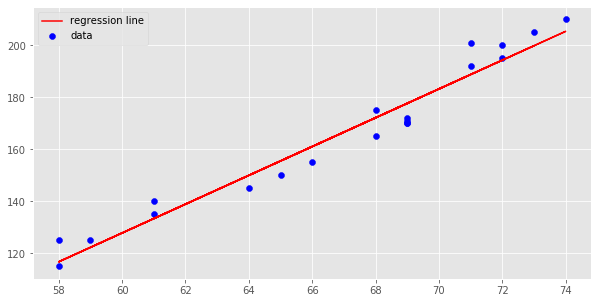

In [47]:
fig,ax=plt.subplots(figsize=(10,5))
ax1=plt.scatter(X,Y, color='blue', label='data')
ax2=plt.plot(X,regression_line,color='red', label='regression line')
plt.legend()

In [50]:
x_new = 70
y_prediction = x_new*m+c
y_prediction

183.2479105830227

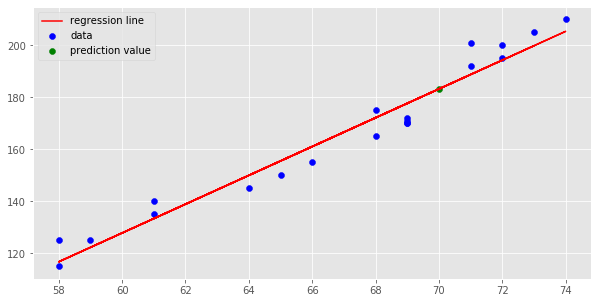

In [49]:
fig,ax=plt.subplots(figsize=(10,5))
ax1=plt.scatter(X,Y, color='blue', label='data')
ax2=plt.plot(X,regression_line,color='red', label='regression line')
ax3=plt.scatter(x_new,y_prediction, color='green', label='prediction value')
plt.legend()